# Problem 1

In [7]:
!pip install -q transformers evaluate

In [2]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from tqdm import tqdm

warnings.filterwarnings('ignore')
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ['TORCH_USE_CUDA_DSA'] = '1'

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
test = pd.read_csv('/kaggle/input/data-hw1-twai/Problem1_dataset.csv')

## a)

In [5]:
print('First 10 test samples:')
for i, example in enumerate(test.text.values[:10]):
  print(f'{i+1}. {example}')

First 10 test samples:
1.  = Robert Boulter = 

2.  Robert Boulter is an English film , television and theatre actor . He had a guest @-@ starring role on the television series The Bill in 2000 . This was followed by a starring role in the play Herons written by Simon Stephens , which was performed in 2001 at the Royal Court Theatre . He had a guest role in the television series Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in the episode " Teddy 's Story " of the television series The Long Firm ; he starred alongside actors Mark Strong and Derek Jacobi . He was cast in the 2005 theatre productions of the Philip Ridley play Mercury Fur , which was performed at the Drum Theatre in Plymouth and the Menier Chocolate Factory in London . He was directed by John Tiffany and starred alongside Ben Whishaw , Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and Dominic Hall . 

3.  In 2006 , Boulter starred alongside Whishaw in the play Citizenship written by Mark R

In [6]:
# Print dataset statistics:
samples = test.text.values
total_samples = len(samples)
print(f'There are {total_samples} samples!\n')

total_chars = len("".join([e for e in samples]))

for i,sample in enumerate(samples):
  if i==5:
    break
  avg_num_chars = round(len(sample)/total_chars,5)
  print('Sample - ', sample, end='\r')
  print(f'There are on average {avg_num_chars} characters in the {i+1} sample')
  print()

There are 187 samples!

Sample -   = Robert Boulter = 
There are on average 0.00023 characters in the 1 sample

Sample -   Robert Boulter is an English film , television and theatre actor . He had a guest @-@ starring role on the television series The Bill in 2000 . This was followed by a starring role in the play Herons written by Simon Stephens , which was performed in 2001 at the Royal Court Theatre . He had a guest role in the television series Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in the episode " Teddy 's Story " of the television series The Long Firm ; he starred alongside actors Mark Strong and Derek Jacobi . He was cast in the 2005 theatre productions of the Philip Ridley play Mercury Fur , which was performed at the Drum Theatre in Plymouth and the Menier Chocolate Factory in London . He was directed by John Tiffany and starred alongside Ben Whishaw , Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and Dominic Hall . 
There are on averag

## b)

In [7]:
def calculate_perplexity(text, model, tokenizer, device, window_length=1024, step_size=256):

    # Tokenize the text
    tokens = tokenizer.encode(text, return_tensors='pt').to(device)  # Ensure tokens are on GPU
    # Get the length of tokens
    num_tokens = tokens.size(1)

    # Initialize total loss and count
    total_loss = 0
    count = 0

    # Move the model to the specified device (GPU)
    model.to(device)

    # Iterate over the text in windows
    for start in range(0, num_tokens, step_size):
        end = min(start + window_length, num_tokens)
        input_ids = tokens[:, start:end].to(device)  # Move input_ids to GPU

        # Ensure input_ids is not empty
        if input_ids.size(1) == 0:
            continue

        # Get model outputs and calculate loss
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
            loss = outputs.loss.item()

        # Accumulate loss and count
        total_loss += loss * input_ids.size(1)
        count += input_ids.size(1)

    # Calculate average loss
    average_loss = total_loss / count

    # Calculate perplexity
    perplexity = np.exp(average_loss)

    return perplexity

In [8]:
# Complete code for HuggingFace GPT2 model (small, medium, and large) evaluation, according to the perplexity metric

# Load Models
gpt2_small_model = GPT2LMHeadModel.from_pretrained('gpt2')
gpt2_small_tokenizer = GPT2TokenizerFast.from_pretrained('gpt2')

gpt2_medium_model = GPT2LMHeadModel.from_pretrained('gpt2-medium')
gpt2_medium_tokenizer = GPT2TokenizerFast.from_pretrained('gpt2-medium')

gpt2_large_model = GPT2LMHeadModel.from_pretrained('gpt2-large')
gpt2_large_tokenizer = GPT2TokenizerFast.from_pretrained('gpt2-large')

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [9]:
small_perps = []
medium_perps = []
large_perps = []
for sample in enumerate(tqdm(samples)):
  sample = sample[1]
  small_perps.append(calculate_perplexity(sample, gpt2_small_model, gpt2_small_tokenizer, device))
  medium_perps.append(calculate_perplexity(sample, gpt2_medium_model, gpt2_medium_tokenizer, device))
  large_perps.append(calculate_perplexity(sample, gpt2_large_model, gpt2_large_tokenizer, device))

100%|██████████| 187/187 [00:30<00:00,  6.19it/s]


Printing results for GPT-2 Small model
25th Percentile: 46.40217567630185
75th Percentile: 276.11094741527165
Midhinge: 161.25656154578675
Median: 67.30752334305188


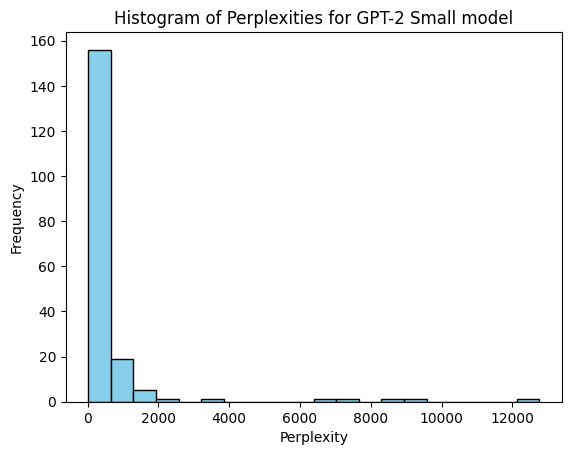

Printing results for GPT-2 Medium model
25th Percentile: 34.64231364050474
75th Percentile: 277.53644446766344
Midhinge: 156.08937905408408
Median: 47.35342138334002


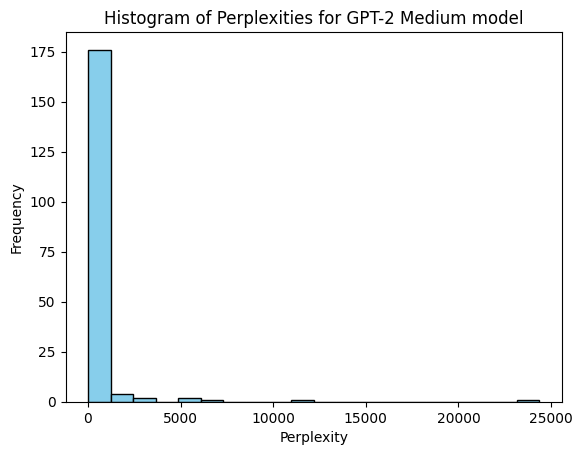

Printing results for GPT-2 Large model
25th Percentile: 29.106181351205585
75th Percentile: 235.48645138789593
Midhinge: 132.29631636955077
Median: 41.22056972785153


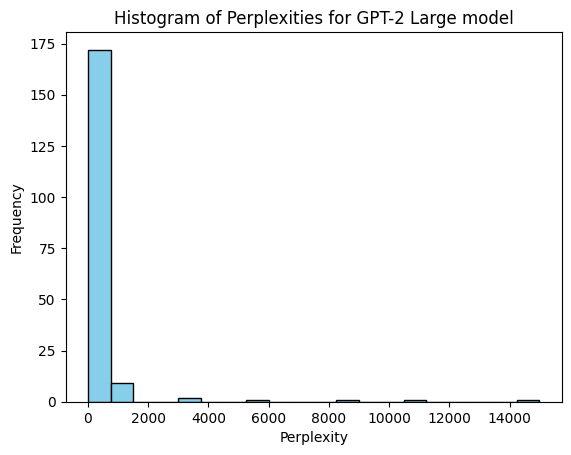

In [10]:
# Print results:
def plot_perplexities(perplexities, name):
  print(f'Printing results for {name} model')
  # Calculate the 25th and 75th percentiles
  p25 = np.percentile(perplexities, 25)
  p75 = np.percentile(perplexities, 75)

  # Calculate the midhinge (average of the 25th and 75th percentiles)
  midhinge = (p25 + p75) / 2

  # Calculate the median
  median = np.median(perplexities)

  # Output the values
  print(f"25th Percentile: {p25}")
  print(f"75th Percentile: {p75}")
  print(f"Midhinge: {midhinge}")
  print(f"Median: {median}")

  # Plot a histogram of the perplexities
  plt.hist(perplexities, bins=20, color='skyblue', edgecolor='black')
  plt.title(f'Histogram of Perplexities for {name} model')
  plt.xlabel('Perplexity')
  plt.ylabel('Frequency')
  plt.show()

plot_perplexities(small_perps, 'GPT-2 Small')
plot_perplexities(medium_perps, 'GPT-2 Medium')
plot_perplexities(large_perps, 'GPT-2 Large')

## c)

The perplexities of all the three models are right skewed meaning the models are not being surprised in generating the next token in the sequence and are performing relatively well.

In [14]:
# Finding 3 sentences with lowest and highest perplexities.
x = np.argsort(large_perps)

# Printing top 3 sentences with lowest perplexities 
print('\t\tTop 3 Sentences with Lowest Perplexities')
for i in range(3):
    print(f'Sample {i+1}')
    print(f'Perplexity: {large_perps[x[i]]}')
    print(f'Sentence: {samples[x[i]]}')
    print()

		Top 3 Sentences with Lowest Perplexities
Sample 1
Perplexity: 13.815390057070363
Sentence:  The ships ' secondary armament consisted of twenty 50 @-@ calibre 14 @-@ centimetre Type 3 . Eighteen of these were mounted in casemates in the forecastle and superstructure and the remaining pair were mounted on the deck above them and protected by gun shields . They had a maximum elevation of + 20 degrees which gave them ranges of 16 @,@ 300 metres ( 17 @,@ 800 yd ) . Each gun had a rate of fire of up to 10 rounds per minute . Anti @-@ aircraft defence was provided by four 40 @-@ calibre 3rd Year Type 8 @-@ centimetre AA guns in single mounts . The 7 @.@ 62 @-@ centimetre ( 3 in ) high @-@ angle guns had a maximum elevation of + 75 degrees , and had a rate of fire of 13 to 20 rounds per minute . They fired a 6 kg ( 13 lb ) projectile with a muzzle velocity of 680 m / s ( 2 @,@ 200 ft / s ) to a maximum height of 7 @,@ 500 metres ( 24 @,@ 600 ft ) . The ships were also fitted with six submerg

In [15]:
# Finding 3 sentences with lowest and highest perplexities.
x = np.argsort(large_perps)[::-1]

# Printing top 3 sentences with lowest perplexities 
print('\t\tTop 3 Sentences with Highest Perplexities')
for i in range(3):
    print(f'Sample {i+1}')
    print(f'Perplexity: {large_perps[x[i]]}')
    print(f'Sentence: {samples[x[i]]}')
    print()

		Top 3 Sentences with Highest Perplexities
Sample 1
Perplexity: 14977.117170659934
Sentence:  = 1933 Treasure Coast hurricane = 


Sample 2
Perplexity: 10631.543851404731
Sentence:  CD single 


Sample 3
Perplexity: 8314.274861806212
Sentence:  = Du Fu = 




The sentences with high perplexities convey the reason as they are relatively shorter, lack context, and the specific event may be relatively rare or uncommon in the training data, leading to uncertainty for the model. 

On the contrary, sentences with lower perplexity values are having detailed description, filled with specific and structured information. Despite their complexity, it has low perplexity because the language and format are highly structured, likely resembling other technical descriptions in the model's training data, making it easier for the model to predict.

# Problem 2

In [11]:
# Installing dependencies
!pip install --quiet faiss-gpu mauve-text

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [59]:
#Imports
from transformers import GPT2Tokenizer, GPT2LMHeadModel

from tqdm import tqdm
import torch
import json
import os
import sys
import requests
import pickle
import evaluate
import mauve
import numpy as np

seed = 123
torch.manual_seed(seed)
np.random.seed(seed)

In [ ]:
# Load test set
with open('/kaggle/input/data-hw1-twai/Problem2_dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [16]:
print('First 2 test samples:')
for i, example in enumerate(dataset[:2]):
  print(f'{i+1}. {example["text"]}')

First 2 test samples:
1. Is this restaurant family-friendly ? Yes No Unsure

Does this restaurant accept reservations ? Yes No Unsure

Are the prices at this restaurant mid-range / moderate? Yes No Unsure

Is this restaurant good for dinner? Yes No Unsure

Is this restaurant good for lunch? Yes No Unsure

Is this a Japanese restaurant? Yes No Unsure

Could this location be considered a specialty food market? Yes No Unsure

Does this restaurant have waiters and waitresses ? Yes No Unsure

Is this restaurant a hidden gem or off-the-beaten path? Yes No Unsure

Is this primarily a bakery ? Yes No Unsure
2. Clinton talks about her time of 'reflection' during sick days

Hillary Clinton returned to the campaign trail Thursday afternoon, debuting some new intro music and telling the crowd that her sick days allowed her a chance to "reconnect with what this whole campaign is about."

The former secretary of state, who took the stage to James Brown's "I Feel Good," spent the beginning of the wee

## a)

In [3]:
# Function to generate text using greedy decoding
def generate_greedy(inputs, max_new_tokens):
    output = model.generate(**inputs, max_new_tokens=max_new_tokens, do_sample=False)
    return tokenizer.decode(output[0], skip_special_tokens=True)

# Function to generate text using top-k sampling
def generate_top_k(inputs, max_new_tokens, k=10):
    output = model.generate(**inputs, max_new_tokens=max_new_tokens, do_sample=True, top_k=k)
    return tokenizer.decode(output[0], skip_special_tokens=True)

# Function to generate text using beam search
def generate_beam_search(inputs, max_new_tokens, num_beams=3):
    output = model.generate(**inputs, max_new_tokens=max_new_tokens, num_beams=num_beams, early_stopping=True)
    return tokenizer.decode(output[0], skip_special_tokens=True)


In [13]:
# Load GPT-2 large tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-large')
model = GPT2LMHeadModel.from_pretrained('gpt2-large').to(device)

# Ensure model is in evaluation mode
model.eval()

# Define max length for generation
max_gen_length = 50  # 50 tokens as per the assignment
prefix_length = 10    # Use the first 10 tokens as the prefix

# Store generated results for analysis
ground_truth = []  # The original sentences from the dataset
generated_greedy = []
generated_top_k = []
generated_beam = []

# Process the dataset, selecting first 10 tokens as prefix and generating text
for sentence in tqdm(dataset):
    sentence = sentence['text']
    # Tokenize the first 10 tokens of each sentence
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    inputs = tokenizer(sentence, return_tensors='pt', padding='max_length', truncation=True, max_length=prefix_length).to(device)

    # Generate text with different strategies
    generated_greedy.append(generate_greedy(inputs, max_new_tokens=max_gen_length))
    generated_top_k.append(generate_top_k(inputs, max_new_tokens=max_gen_length))
    generated_beam.append(generate_beam_search(inputs, max_new_tokens=max_gen_length))

    # Store the original ground truth sentence
    enc_sentence = tokenizer(sentence, return_tensors='pt', truncation=True, max_length=50)
    dec_sentence = tokenizer.decode(enc_sentence['input_ids'][0])
    ground_truth.append(dec_sentence)

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████| 200/200 [00:01<00:00, 103.31it/s]


## b)

In [15]:
def compute_mauve(generated_text, reference_text):
    return mauve.compute_mauve(p_text=reference_text, q_text=generated_text, device_id=0, verbose=False)

In [16]:
mauve_ = {}
mauve_['greedy'] = compute_mauve(generated_greedy, ground_truth).mauve
mauve_['top_k'] = compute_mauve(generated_top_k, ground_truth).mauve
mauve_['beam'] = compute_mauve(generated_beam, ground_truth).mauve

for e in mauve_:
    print(f'Mauve score for {e} method: {mauve_[e]}')

Featurizing p:   0%|          | 0/200 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/200 [00:00<?, ?it/s]

WARNING clustering 400 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/200 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/200 [00:00<?, ?it/s]

WARNING clustering 400 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/200 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/200 [00:00<?, ?it/s]

WARNING clustering 400 points to 20 centroids: please provide at least 780 training points


Mauve score for greedy method: 0.8229049841900652
Mauve score for top_k method: 0.9035953835349086
Mauve score for beam method: 0.6785862391135051


The mauve scores for the three generation strategies are mentioned above with the mauve score for the top_k method being the highest meaning the method is performing better than the other two. The lower mauve score indicates the machine generated text distribution being farther from the ground truth text distribution. 

## c)

In [12]:
# Compute MAUVE scores
greedy_scores = []
for p, q in zip(generated_greedy, ground_truth):
  greedy_scores.append(compute_mauve(p, q).mauve)

Featurizing p:   0%|          | 0/228 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/253 [00:00<?, ?it/s]

WARNING clustering 481 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/249 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/280 [00:00<?, ?it/s]

WARNING clustering 529 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/305 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/276 [00:00<?, ?it/s]

WARNING clustering 581 points to 28 centroids: please provide at least 1092 training points


Featurizing p:   0%|          | 0/193 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/243 [00:00<?, ?it/s]

WARNING clustering 436 points to 19 centroids: please provide at least 741 training points


Featurizing p:   0%|          | 0/150 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/203 [00:00<?, ?it/s]

WARNING clustering 353 points to 15 centroids: please provide at least 585 training points


Featurizing p:   0%|          | 0/212 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/260 [00:00<?, ?it/s]

WARNING clustering 472 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/258 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/288 [00:00<?, ?it/s]

WARNING clustering 546 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/232 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/232 [00:00<?, ?it/s]

WARNING clustering 464 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/168 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/215 [00:00<?, ?it/s]

WARNING clustering 383 points to 17 centroids: please provide at least 663 training points


Featurizing p:   0%|          | 0/223 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/285 [00:00<?, ?it/s]

WARNING clustering 508 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/245 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/269 [00:00<?, ?it/s]

WARNING clustering 514 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/202 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/242 [00:00<?, ?it/s]

WARNING clustering 444 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/236 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/270 [00:00<?, ?it/s]

WARNING clustering 506 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/257 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/316 [00:00<?, ?it/s]

WARNING clustering 573 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/227 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/264 [00:00<?, ?it/s]

WARNING clustering 491 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/236 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/285 [00:00<?, ?it/s]

WARNING clustering 521 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/246 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/244 [00:00<?, ?it/s]

WARNING clustering 490 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/206 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/248 [00:00<?, ?it/s]

WARNING clustering 454 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/190 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/251 [00:00<?, ?it/s]

WARNING clustering 441 points to 19 centroids: please provide at least 741 training points


Featurizing p:   0%|          | 0/237 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/210 [00:00<?, ?it/s]

WARNING clustering 447 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/271 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/187 [00:00<?, ?it/s]

WARNING clustering 458 points to 19 centroids: please provide at least 741 training points


Featurizing p:   0%|          | 0/237 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/252 [00:00<?, ?it/s]

WARNING clustering 489 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/244 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/299 [00:00<?, ?it/s]

WARNING clustering 543 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/299 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/320 [00:00<?, ?it/s]

WARNING clustering 619 points to 30 centroids: please provide at least 1170 training points


Featurizing p:   0%|          | 0/231 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/263 [00:00<?, ?it/s]

WARNING clustering 494 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/222 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/241 [00:00<?, ?it/s]

WARNING clustering 463 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/254 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/263 [00:00<?, ?it/s]

WARNING clustering 517 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/276 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/268 [00:00<?, ?it/s]

WARNING clustering 544 points to 27 centroids: please provide at least 1053 training points


Featurizing p:   0%|          | 0/241 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/360 [00:00<?, ?it/s]

WARNING clustering 601 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/251 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/272 [00:00<?, ?it/s]

WARNING clustering 523 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/214 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/229 [00:00<?, ?it/s]

WARNING clustering 443 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/216 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/213 [00:00<?, ?it/s]

WARNING clustering 429 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/226 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/250 [00:00<?, ?it/s]

WARNING clustering 476 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/243 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/282 [00:00<?, ?it/s]

WARNING clustering 525 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/227 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/269 [00:00<?, ?it/s]

WARNING clustering 496 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/147 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/185 [00:00<?, ?it/s]

WARNING clustering 332 points to 15 centroids: please provide at least 585 training points


Featurizing p:   0%|          | 0/261 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/272 [00:00<?, ?it/s]

WARNING clustering 533 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/198 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/241 [00:00<?, ?it/s]

WARNING clustering 439 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/238 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/294 [00:00<?, ?it/s]

WARNING clustering 532 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/188 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/255 [00:00<?, ?it/s]

WARNING clustering 443 points to 19 centroids: please provide at least 741 training points


Featurizing p:   0%|          | 0/204 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/242 [00:00<?, ?it/s]

WARNING clustering 446 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/244 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/286 [00:00<?, ?it/s]

WARNING clustering 530 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/296 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/354 [00:00<?, ?it/s]

WARNING clustering 650 points to 30 centroids: please provide at least 1170 training points


Featurizing p:   0%|          | 0/202 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/211 [00:00<?, ?it/s]

WARNING clustering 413 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/250 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/259 [00:00<?, ?it/s]

WARNING clustering 509 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/239 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/257 [00:00<?, ?it/s]

WARNING clustering 496 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/189 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/196 [00:00<?, ?it/s]

WARNING clustering 385 points to 19 centroids: please provide at least 741 training points


Featurizing p:   0%|          | 0/237 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/317 [00:00<?, ?it/s]

WARNING clustering 554 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/221 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/298 [00:00<?, ?it/s]

WARNING clustering 519 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/188 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/239 [00:00<?, ?it/s]

WARNING clustering 427 points to 19 centroids: please provide at least 741 training points


Featurizing p:   0%|          | 0/154 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/85 [00:00<?, ?it/s]

WARNING clustering 239 points to 8 centroids: please provide at least 312 training points


Featurizing p:   0%|          | 0/277 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/291 [00:00<?, ?it/s]

WARNING clustering 568 points to 28 centroids: please provide at least 1092 training points


Featurizing p:   0%|          | 0/174 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/50 [00:00<?, ?it/s]

Featurizing p:   0%|          | 0/248 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/242 [00:00<?, ?it/s]

WARNING clustering 490 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/205 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/260 [00:00<?, ?it/s]

WARNING clustering 465 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/221 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/264 [00:00<?, ?it/s]

WARNING clustering 485 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/238 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/272 [00:00<?, ?it/s]

WARNING clustering 510 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/258 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/263 [00:00<?, ?it/s]

WARNING clustering 521 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/184 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/213 [00:00<?, ?it/s]

WARNING clustering 397 points to 18 centroids: please provide at least 702 training points


Featurizing p:   0%|          | 0/261 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/254 [00:00<?, ?it/s]

WARNING clustering 515 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/197 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/183 [00:00<?, ?it/s]

WARNING clustering 380 points to 18 centroids: please provide at least 702 training points


Featurizing p:   0%|          | 0/236 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/255 [00:00<?, ?it/s]

WARNING clustering 491 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/201 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/255 [00:00<?, ?it/s]

WARNING clustering 456 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/250 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/266 [00:00<?, ?it/s]

WARNING clustering 516 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/138 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/177 [00:00<?, ?it/s]

WARNING clustering 315 points to 14 centroids: please provide at least 546 training points


Featurizing p:   0%|          | 0/170 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/252 [00:00<?, ?it/s]

WARNING clustering 422 points to 17 centroids: please provide at least 663 training points


Featurizing p:   0%|          | 0/179 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/262 [00:00<?, ?it/s]

WARNING clustering 441 points to 18 centroids: please provide at least 702 training points


Featurizing p:   0%|          | 0/272 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/306 [00:00<?, ?it/s]

WARNING clustering 578 points to 27 centroids: please provide at least 1053 training points


Featurizing p:   0%|          | 0/225 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/235 [00:00<?, ?it/s]

WARNING clustering 460 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/205 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/225 [00:00<?, ?it/s]

WARNING clustering 430 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/128 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/106 [00:00<?, ?it/s]

WARNING clustering 234 points to 11 centroids: please provide at least 429 training points


Featurizing p:   0%|          | 0/231 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/192 [00:00<?, ?it/s]

WARNING clustering 423 points to 19 centroids: please provide at least 741 training points


Featurizing p:   0%|          | 0/254 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/252 [00:00<?, ?it/s]

WARNING clustering 506 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/233 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/253 [00:00<?, ?it/s]

WARNING clustering 486 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/231 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/234 [00:00<?, ?it/s]

WARNING clustering 465 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/250 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/275 [00:00<?, ?it/s]

WARNING clustering 525 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/210 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/231 [00:00<?, ?it/s]

WARNING clustering 441 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/238 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/245 [00:00<?, ?it/s]

WARNING clustering 483 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/222 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/263 [00:00<?, ?it/s]

WARNING clustering 485 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/227 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/252 [00:00<?, ?it/s]

WARNING clustering 479 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/279 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/301 [00:00<?, ?it/s]

WARNING clustering 580 points to 28 centroids: please provide at least 1092 training points


Featurizing p:   0%|          | 0/237 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/242 [00:00<?, ?it/s]

WARNING clustering 479 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/168 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/233 [00:00<?, ?it/s]

WARNING clustering 401 points to 17 centroids: please provide at least 663 training points


Featurizing p:   0%|          | 0/259 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/298 [00:00<?, ?it/s]

WARNING clustering 557 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/237 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/273 [00:00<?, ?it/s]

WARNING clustering 510 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/222 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/257 [00:00<?, ?it/s]

WARNING clustering 479 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/182 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/253 [00:00<?, ?it/s]

WARNING clustering 435 points to 18 centroids: please provide at least 702 training points


Featurizing p:   0%|          | 0/269 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/266 [00:00<?, ?it/s]

WARNING clustering 535 points to 27 centroids: please provide at least 1053 training points


Featurizing p:   0%|          | 0/232 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/218 [00:00<?, ?it/s]

WARNING clustering 450 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/195 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/287 [00:00<?, ?it/s]

WARNING clustering 482 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/200 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/232 [00:00<?, ?it/s]

WARNING clustering 432 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/171 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/222 [00:00<?, ?it/s]

WARNING clustering 393 points to 17 centroids: please provide at least 663 training points


Featurizing p:   0%|          | 0/254 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/270 [00:00<?, ?it/s]

WARNING clustering 524 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/251 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/247 [00:00<?, ?it/s]

WARNING clustering 498 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/199 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/237 [00:00<?, ?it/s]

WARNING clustering 436 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/235 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/251 [00:00<?, ?it/s]

WARNING clustering 486 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/175 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/259 [00:00<?, ?it/s]

WARNING clustering 434 points to 18 centroids: please provide at least 702 training points


Featurizing p:   0%|          | 0/211 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/209 [00:00<?, ?it/s]

WARNING clustering 420 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/195 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/268 [00:00<?, ?it/s]

WARNING clustering 463 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/221 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/270 [00:00<?, ?it/s]

WARNING clustering 491 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/245 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/264 [00:00<?, ?it/s]

WARNING clustering 509 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/246 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/255 [00:00<?, ?it/s]

WARNING clustering 501 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/191 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/254 [00:00<?, ?it/s]

WARNING clustering 445 points to 19 centroids: please provide at least 741 training points


Featurizing p:   0%|          | 0/226 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/206 [00:00<?, ?it/s]

WARNING clustering 432 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/227 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/237 [00:00<?, ?it/s]

WARNING clustering 464 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/265 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/286 [00:00<?, ?it/s]

WARNING clustering 551 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/186 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/230 [00:00<?, ?it/s]

WARNING clustering 416 points to 19 centroids: please provide at least 741 training points


Featurizing p:   0%|          | 0/171 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/214 [00:00<?, ?it/s]

WARNING clustering 385 points to 17 centroids: please provide at least 663 training points


Featurizing p:   0%|          | 0/260 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/255 [00:00<?, ?it/s]

WARNING clustering 515 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/202 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/207 [00:00<?, ?it/s]

WARNING clustering 409 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/235 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/233 [00:00<?, ?it/s]

WARNING clustering 468 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/223 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/229 [00:00<?, ?it/s]

WARNING clustering 452 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/245 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/287 [00:00<?, ?it/s]

WARNING clustering 532 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/189 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/169 [00:00<?, ?it/s]

WARNING clustering 358 points to 17 centroids: please provide at least 663 training points


Featurizing p:   0%|          | 0/257 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/303 [00:00<?, ?it/s]

WARNING clustering 560 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/248 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/278 [00:00<?, ?it/s]

WARNING clustering 526 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/235 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/262 [00:00<?, ?it/s]

WARNING clustering 497 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/199 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/234 [00:00<?, ?it/s]

WARNING clustering 433 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/243 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/226 [00:00<?, ?it/s]

WARNING clustering 469 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/243 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/238 [00:00<?, ?it/s]

WARNING clustering 481 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/243 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/203 [00:00<?, ?it/s]

WARNING clustering 446 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/260 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/277 [00:00<?, ?it/s]

WARNING clustering 537 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/175 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/241 [00:00<?, ?it/s]

WARNING clustering 416 points to 18 centroids: please provide at least 702 training points


Featurizing p:   0%|          | 0/251 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/285 [00:00<?, ?it/s]

WARNING clustering 536 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/213 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/228 [00:00<?, ?it/s]

WARNING clustering 441 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/217 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/130 [00:00<?, ?it/s]

WARNING clustering 347 points to 13 centroids: please provide at least 507 training points


Featurizing p:   0%|          | 0/222 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/205 [00:00<?, ?it/s]

WARNING clustering 427 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/234 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/297 [00:00<?, ?it/s]

WARNING clustering 531 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/207 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/267 [00:00<?, ?it/s]

WARNING clustering 474 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/221 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/281 [00:00<?, ?it/s]

WARNING clustering 502 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/259 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/321 [00:00<?, ?it/s]

WARNING clustering 580 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/235 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/253 [00:00<?, ?it/s]

WARNING clustering 488 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/212 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/246 [00:00<?, ?it/s]

WARNING clustering 458 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/304 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/323 [00:00<?, ?it/s]

WARNING clustering 627 points to 30 centroids: please provide at least 1170 training points


Featurizing p:   0%|          | 0/224 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/247 [00:00<?, ?it/s]

WARNING clustering 471 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/207 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/211 [00:00<?, ?it/s]

WARNING clustering 418 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/294 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/307 [00:00<?, ?it/s]

WARNING clustering 601 points to 29 centroids: please provide at least 1131 training points


Featurizing p:   0%|          | 0/163 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/221 [00:00<?, ?it/s]

WARNING clustering 384 points to 16 centroids: please provide at least 624 training points


Featurizing p:   0%|          | 0/233 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/253 [00:00<?, ?it/s]

WARNING clustering 486 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/242 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/260 [00:00<?, ?it/s]

WARNING clustering 502 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/245 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/276 [00:00<?, ?it/s]

WARNING clustering 521 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/220 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/142 [00:00<?, ?it/s]

WARNING clustering 362 points to 14 centroids: please provide at least 546 training points


Featurizing p:   0%|          | 0/221 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/234 [00:00<?, ?it/s]

WARNING clustering 455 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/263 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/282 [00:00<?, ?it/s]

WARNING clustering 545 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/204 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/224 [00:00<?, ?it/s]

WARNING clustering 428 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/228 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/262 [00:00<?, ?it/s]

WARNING clustering 490 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/174 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/139 [00:00<?, ?it/s]

WARNING clustering 313 points to 14 centroids: please provide at least 546 training points


Featurizing p:   0%|          | 0/186 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/220 [00:00<?, ?it/s]

WARNING clustering 406 points to 19 centroids: please provide at least 741 training points


Featurizing p:   0%|          | 0/143 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/182 [00:00<?, ?it/s]

WARNING clustering 325 points to 14 centroids: please provide at least 546 training points


Featurizing p:   0%|          | 0/235 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/256 [00:00<?, ?it/s]

WARNING clustering 491 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/254 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/290 [00:00<?, ?it/s]

WARNING clustering 544 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/155 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/264 [00:00<?, ?it/s]

WARNING clustering 419 points to 16 centroids: please provide at least 624 training points


Featurizing p:   0%|          | 0/220 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/281 [00:00<?, ?it/s]

WARNING clustering 501 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/239 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/277 [00:00<?, ?it/s]

WARNING clustering 516 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/184 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/230 [00:00<?, ?it/s]

WARNING clustering 414 points to 18 centroids: please provide at least 702 training points


Featurizing p:   0%|          | 0/208 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/279 [00:00<?, ?it/s]

WARNING clustering 487 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/294 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/298 [00:00<?, ?it/s]

WARNING clustering 592 points to 29 centroids: please provide at least 1131 training points


Featurizing p:   0%|          | 0/180 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/178 [00:00<?, ?it/s]

WARNING clustering 358 points to 18 centroids: please provide at least 702 training points


Featurizing p:   0%|          | 0/227 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/256 [00:00<?, ?it/s]

WARNING clustering 483 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/214 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/276 [00:00<?, ?it/s]

WARNING clustering 490 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/258 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/231 [00:00<?, ?it/s]

WARNING clustering 489 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/214 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/287 [00:00<?, ?it/s]

WARNING clustering 501 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/203 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/213 [00:00<?, ?it/s]

WARNING clustering 416 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/236 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/238 [00:00<?, ?it/s]

WARNING clustering 474 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/228 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/236 [00:00<?, ?it/s]

WARNING clustering 464 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/175 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/235 [00:00<?, ?it/s]

WARNING clustering 410 points to 18 centroids: please provide at least 702 training points


Featurizing p:   0%|          | 0/259 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/252 [00:00<?, ?it/s]

WARNING clustering 511 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/211 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/243 [00:00<?, ?it/s]

WARNING clustering 454 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/210 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/290 [00:00<?, ?it/s]

WARNING clustering 500 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/254 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/297 [00:00<?, ?it/s]

WARNING clustering 551 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/206 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/160 [00:00<?, ?it/s]

WARNING clustering 366 points to 16 centroids: please provide at least 624 training points


Featurizing p:   0%|          | 0/236 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/231 [00:00<?, ?it/s]

WARNING clustering 467 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/240 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/260 [00:00<?, ?it/s]

WARNING clustering 500 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/261 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/269 [00:00<?, ?it/s]

WARNING clustering 530 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/228 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/244 [00:00<?, ?it/s]

WARNING clustering 472 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/174 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/265 [00:00<?, ?it/s]

WARNING clustering 439 points to 17 centroids: please provide at least 663 training points


Featurizing p:   0%|          | 0/217 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/273 [00:00<?, ?it/s]

WARNING clustering 490 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/210 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/241 [00:00<?, ?it/s]

WARNING clustering 451 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/276 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/239 [00:00<?, ?it/s]

WARNING clustering 515 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/203 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/263 [00:00<?, ?it/s]

WARNING clustering 466 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/200 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/142 [00:00<?, ?it/s]

WARNING clustering 342 points to 14 centroids: please provide at least 546 training points


Featurizing p:   0%|          | 0/243 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/276 [00:00<?, ?it/s]

WARNING clustering 519 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/227 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/268 [00:00<?, ?it/s]

WARNING clustering 495 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/249 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/308 [00:00<?, ?it/s]

WARNING clustering 557 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/241 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/308 [00:00<?, ?it/s]

WARNING clustering 549 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/219 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/247 [00:00<?, ?it/s]

WARNING clustering 466 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/232 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/262 [00:00<?, ?it/s]

WARNING clustering 494 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/208 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/240 [00:00<?, ?it/s]

WARNING clustering 448 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/241 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/221 [00:00<?, ?it/s]

WARNING clustering 462 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/241 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/213 [00:00<?, ?it/s]

WARNING clustering 454 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/199 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/270 [00:00<?, ?it/s]

WARNING clustering 469 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/228 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/247 [00:00<?, ?it/s]

WARNING clustering 475 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/208 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/234 [00:00<?, ?it/s]

WARNING clustering 442 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/211 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/239 [00:00<?, ?it/s]

WARNING clustering 450 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/211 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/254 [00:00<?, ?it/s]

WARNING clustering 465 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/245 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/268 [00:00<?, ?it/s]

WARNING clustering 513 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/237 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/284 [00:00<?, ?it/s]

WARNING clustering 521 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/212 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/300 [00:00<?, ?it/s]

WARNING clustering 512 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/273 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/287 [00:00<?, ?it/s]

WARNING clustering 560 points to 27 centroids: please provide at least 1053 training points


Featurizing p:   0%|          | 0/221 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/224 [00:00<?, ?it/s]

WARNING clustering 445 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/200 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/200 [00:00<?, ?it/s]

WARNING clustering 400 points to 20 centroids: please provide at least 780 training points


In [14]:
top_k_scores = []
for p, q in zip(generated_top_k, ground_truth):
  top_k_scores.append(compute_mauve(p, q).mauve)

Featurizing p:   0%|          | 0/207 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/180 [00:00<?, ?it/s]

WARNING clustering 387 points to 18 centroids: please provide at least 702 training points


Featurizing p:   0%|          | 0/230 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/227 [00:00<?, ?it/s]

WARNING clustering 457 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/271 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/214 [00:00<?, ?it/s]

WARNING clustering 485 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/293 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/258 [00:00<?, ?it/s]

WARNING clustering 551 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/248 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/214 [00:00<?, ?it/s]

WARNING clustering 462 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/214 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/203 [00:00<?, ?it/s]

WARNING clustering 417 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/253 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/236 [00:00<?, ?it/s]

WARNING clustering 489 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/269 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/228 [00:00<?, ?it/s]

WARNING clustering 497 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/249 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/175 [00:00<?, ?it/s]

WARNING clustering 424 points to 18 centroids: please provide at least 702 training points


Featurizing p:   0%|          | 0/297 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/259 [00:00<?, ?it/s]

WARNING clustering 556 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/237 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/211 [00:00<?, ?it/s]

WARNING clustering 448 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/279 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/210 [00:00<?, ?it/s]

WARNING clustering 489 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/332 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/254 [00:00<?, ?it/s]

WARNING clustering 586 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/278 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/206 [00:00<?, ?it/s]

WARNING clustering 484 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/220 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/236 [00:00<?, ?it/s]

WARNING clustering 456 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/258 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/240 [00:00<?, ?it/s]

WARNING clustering 498 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/267 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/261 [00:00<?, ?it/s]

WARNING clustering 528 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/278 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/228 [00:00<?, ?it/s]

WARNING clustering 506 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/248 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/174 [00:00<?, ?it/s]

WARNING clustering 422 points to 17 centroids: please provide at least 663 training points


Featurizing p:   0%|          | 0/266 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/217 [00:00<?, ?it/s]

WARNING clustering 483 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/273 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/210 [00:00<?, ?it/s]

WARNING clustering 483 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/287 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/276 [00:00<?, ?it/s]

WARNING clustering 563 points to 28 centroids: please provide at least 1092 training points


Featurizing p:   0%|          | 0/281 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/203 [00:00<?, ?it/s]

WARNING clustering 484 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/241 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/200 [00:00<?, ?it/s]

WARNING clustering 441 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/247 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/243 [00:00<?, ?it/s]

WARNING clustering 490 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/267 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/227 [00:00<?, ?it/s]

WARNING clustering 494 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/290 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/249 [00:00<?, ?it/s]

WARNING clustering 539 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/317 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/241 [00:00<?, ?it/s]

WARNING clustering 558 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/260 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/219 [00:00<?, ?it/s]

WARNING clustering 479 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/262 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/232 [00:00<?, ?it/s]

WARNING clustering 494 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/251 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/208 [00:00<?, ?it/s]

WARNING clustering 459 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/298 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/241 [00:00<?, ?it/s]

WARNING clustering 539 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/256 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/241 [00:00<?, ?it/s]

WARNING clustering 497 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/222 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/199 [00:00<?, ?it/s]

WARNING clustering 421 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/282 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/228 [00:00<?, ?it/s]

WARNING clustering 510 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/220 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/208 [00:00<?, ?it/s]

WARNING clustering 428 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/281 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/211 [00:00<?, ?it/s]

WARNING clustering 492 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/260 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/211 [00:00<?, ?it/s]

WARNING clustering 471 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/239 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/245 [00:00<?, ?it/s]

WARNING clustering 484 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/281 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/237 [00:00<?, ?it/s]

WARNING clustering 518 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/305 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/212 [00:00<?, ?it/s]

WARNING clustering 517 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/322 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/273 [00:00<?, ?it/s]

WARNING clustering 595 points to 27 centroids: please provide at least 1053 training points


Featurizing p:   0%|          | 0/254 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/221 [00:00<?, ?it/s]

WARNING clustering 475 points to 22 centroids: please provide at least 858 training points


In [ ]:
beam_scores = []
for p, q in zip(generated_beam, ground_truth):
  beam_scores.append(compute_mauve(p, q).mauve)

Featurizing p:   0%|          | 0/268 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/228 [00:00<?, ?it/s]

WARNING clustering 496 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/223 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/249 [00:00<?, ?it/s]

WARNING clustering 472 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/293 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/305 [00:00<?, ?it/s]

WARNING clustering 598 points to 29 centroids: please provide at least 1131 training points


Featurizing p:   0%|          | 0/95 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/193 [00:00<?, ?it/s]

WARNING clustering 288 points to 10 centroids: please provide at least 390 training points


Featurizing p:   0%|          | 0/141 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/150 [00:00<?, ?it/s]

WARNING clustering 291 points to 14 centroids: please provide at least 546 training points


Featurizing p:   0%|          | 0/230 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/212 [00:00<?, ?it/s]

WARNING clustering 442 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/292 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/258 [00:00<?, ?it/s]

WARNING clustering 550 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/232 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/232 [00:00<?, ?it/s]

WARNING clustering 464 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/222 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/168 [00:00<?, ?it/s]

WARNING clustering 390 points to 17 centroids: please provide at least 663 training points


Featurizing p:   0%|          | 0/273 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/223 [00:00<?, ?it/s]

WARNING clustering 496 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/231 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/245 [00:00<?, ?it/s]

WARNING clustering 476 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/252 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/202 [00:00<?, ?it/s]

WARNING clustering 454 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/272 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/236 [00:00<?, ?it/s]

WARNING clustering 508 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/284 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/257 [00:00<?, ?it/s]

WARNING clustering 541 points to 26 centroids: please provide at least 1014 training points


Featurizing p:   0%|          | 0/272 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/227 [00:00<?, ?it/s]

WARNING clustering 499 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/273 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/236 [00:00<?, ?it/s]

WARNING clustering 509 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/252 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/246 [00:00<?, ?it/s]

WARNING clustering 498 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/244 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/206 [00:00<?, ?it/s]

WARNING clustering 450 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/213 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/190 [00:00<?, ?it/s]

WARNING clustering 403 points to 19 centroids: please provide at least 741 training points


Featurizing p:   0%|          | 0/231 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/237 [00:00<?, ?it/s]

WARNING clustering 468 points to 23 centroids: please provide at least 897 training points


Featurizing p:   0%|          | 0/185 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/271 [00:00<?, ?it/s]

WARNING clustering 456 points to 18 centroids: please provide at least 702 training points


Featurizing p:   0%|          | 0/185 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/237 [00:00<?, ?it/s]

WARNING clustering 422 points to 18 centroids: please provide at least 702 training points


Featurizing p:   0%|          | 0/289 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/244 [00:00<?, ?it/s]

WARNING clustering 533 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/317 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/299 [00:00<?, ?it/s]

WARNING clustering 616 points to 30 centroids: please provide at least 1170 training points


Featurizing p:   0%|          | 0/193 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/231 [00:00<?, ?it/s]

WARNING clustering 424 points to 19 centroids: please provide at least 741 training points


Featurizing p:   0%|          | 0/253 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/222 [00:00<?, ?it/s]

WARNING clustering 475 points to 22 centroids: please provide at least 858 training points


Featurizing p:   0%|          | 0/247 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/254 [00:00<?, ?it/s]

WARNING clustering 501 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/252 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/276 [00:00<?, ?it/s]

WARNING clustering 528 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/279 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/241 [00:00<?, ?it/s]

WARNING clustering 520 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/294 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/251 [00:00<?, ?it/s]

WARNING clustering 545 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/235 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/214 [00:00<?, ?it/s]

WARNING clustering 449 points to 21 centroids: please provide at least 819 training points


Featurizing p:   0%|          | 0/186 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/216 [00:00<?, ?it/s]

WARNING clustering 402 points to 19 centroids: please provide at least 741 training points


Featurizing p:   0%|          | 0/238 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/226 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Featurizing q:   0%|          | 0/238 [00:00<?, ?it/s]

WARNING clustering 502 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/255 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/188 [00:00<?, ?it/s]

WARNING clustering 443 points to 19 centroids: please provide at least 741 training points


Featurizing p:   0%|          | 0/249 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/204 [00:00<?, ?it/s]

WARNING clustering 453 points to 20 centroids: please provide at least 780 training points


Featurizing p:   0%|          | 0/285 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/244 [00:00<?, ?it/s]

WARNING clustering 529 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/313 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/296 [00:00<?, ?it/s]

WARNING clustering 609 points to 30 centroids: please provide at least 1170 training points


Featurizing p:   0%|          | 0/175 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/202 [00:00<?, ?it/s]

WARNING clustering 377 points to 18 centroids: please provide at least 702 training points


Featurizing p:   0%|          | 0/248 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/250 [00:00<?, ?it/s]

WARNING clustering 498 points to 25 centroids: please provide at least 975 training points


Featurizing p:   0%|          | 0/237 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/239 [00:00<?, ?it/s]

WARNING clustering 476 points to 24 centroids: please provide at least 936 training points


Featurizing p:   0%|          | 0/216 [00:00<?, ?it/s]

In [60]:
sort_indices_greedy = np.argsort(greedy_scores)

# Printing highest and lowest mauve score values.

print('\t\t Mauve Score Statistics for Greedy Strategy\n')
print(f'Lowest Mauve score {greedy_scores[sort_indices_greedy[0]]}')
print(f'Sentence: {generated_greedy[sort_indices_greedy[0]]}')
print()
print(f'Highest Mauve score {greedy_scores[sort_indices_greedy[-1]]}')
print(f'Sentence: {generated_greedy[sort_indices_greedy[-1]]}')

		 Mauve Score Statistics for Greedy Strategy

Lowest Mauve score 0.2790984339129409
Sentence: /dʒu·mə/

(dʒu·mə)

(dʒu·mə)

(dʒu·mə)

(dʒu·mə)



Highest Mauve score 0.997867564334721
Sentence: Get Aston Villa FC updates directly to your inbox Subscribe Thank you for subscribing We have more newsletters Show me See our privacy notice Could not subscribe, try again later Invalid Email

Aston Villa are set to make a £5million bid for Manchester City striker Sergio Aguero.

The Argentine is


In [61]:
sort_indices_top_k = np.argsort(top_k_scores)

# Printing highest and lowest mauve score values.

print('\t\t Mauve Score Statistics for Top-k Strategy\n')
print(f'Lowest Mauve score {top_k_scores[sort_indices_top_k[0]]}')
print(f'Sentence: {generated_top_k[sort_indices_top_k[0]]}')
print()
print(f'Highest Mauve score {top_k_scores[sort_indices_top_k[-1]]}')
print(f'Sentence: {generated_top_k[sort_indices_top_k[-1]]}')

		 Mauve Score Statistics for Top-k Strategy

Lowest Mauve score 0.29117410325695225
Sentence: SEE SIZE CHART

Destroyed Straight Edge:

-1

-1

-1

-1

-1

-1

-1

-1

-1

-1

-1

-1

Highest Mauve score 0.9991030975228555
Sentence: Get Aston Villa FC updates directly to your inbox Subscribe Thank you for subscribing We have more newsletters Show me See our privacy notice Could not subscribe, try again later Invalid Email

Aston Villa are lining up a move for Borussia Dortmund star Ilkay Gundogan.

A move for the German


In [23]:
sort_indices_beam = np.argsort(beam_scores)

# Printing highest and lowest mauve score values.

print('\t\t Mauve Score Statistics for Beam Search Strategy\n')
print(f'Lowest Mauve score {beam_scores[sort_indices_beam[0]]}')
print(f'Sentence: {generated_beam[sort_indices_beam[0]]}')
print()
print(f'Highest Mauve score {beam_scores[sort_indices_beam[-1]]}')
print(f'Sentence: {generated_beam[sort_indices_beam[-1]]}')


		 Mauve Score Statistics for Beam Search Strategy

Lowest Mauve score 0.49077748156919876
Sentence: /dʒu·mə/ [dʒuˈmə]

dʒuˈmən/ [dʒuˈmən]

dʒuˈmər/ [dʒu

Highest Mauve score 0.998143357908815
Sentence: Having trouble viewing the video? Try disabling any ad blocking extensions currently running on your browser.

You are not allowed to watch this stream ='(

SALT LAKE CITY — A Utah man was arrested after police say he shot and killed a man who was trying to break into his


The MAUVE scores demonstrate the model's ability to generate human-like text across different contexts. The highest score corresponds to a sentence with relatively easier and understandable context, indicating the model's proficiency in generating text that closely matches typical human writing patterns. Conversely, the lowest score is associated with text which is specialized and uncommon in natural language. This insight is valuable for understanding the model's capabilities and potential areas for improvement in generating diverse types of text.

# Problem 3

In [31]:
!pip install datasets scikit-learn

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [32]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from transformers import get_scheduler
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from transformers import TrainingArguments, Trainer
from sklearn.metrics import roc_curve, auc

In [33]:
# Load IMDb dataset and limit to 1000 samples
dataset = load_dataset('imdb')
train_dataset = dataset['train'].shuffle(seed=42).select(range(1000))
test_dataset = dataset['test'].shuffle(seed=42).select(range(1000))  # Select 100 samples

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [43]:
print('5 Training examples')
for i, example in enumerate(train_dataset['text'][:5]):
  print(f'{i+1}. {example}')

5 Training examples
1. There is no relation at all between Fortier and Profiler but the fact that both are police series about violent crimes. Profiler looks crispy, Fortier looks classic. Profiler plots are quite simple. Fortier's plot are far more complicated... Fortier looks more like Prime Suspect, if we have to spot similarities... The main character is weak and weirdo, but have "clairvoyance". People like to compare, to judge, to evaluate. How about just enjoying? Funny thing too, people writing Fortier looks American but, on the other hand, arguing they prefer American series (!!!). Maybe it's the language, or the spirit, but I think this series is more English than American. By the way, the actors are really good and funny. The acting is not superficial at all...
2. This movie is a great. The plot is very true to the book which is a classic written by Mark Twain. The movie starts of with a scene where Hank sings a song with a bunch of kids called "when you stub your toe on the 

In [44]:
print('5 Testing examples')
for i, example in enumerate(test_dataset['text'][:5]):
  print(f'{i+1}. {example}')


5 Testing examples
1. <br /><br />When I unsuspectedly rented A Thousand Acres, I thought I was in for an entertaining King Lear story and of course Michelle Pfeiffer was in it, so what could go wrong?<br /><br />Very quickly, however, I realized that this story was about A Thousand Other Things besides just Acres. I started crying and couldn't stop until long after the movie ended. Thank you Jane, Laura and Jocelyn, for bringing us such a wonderfully subtle and compassionate movie! Thank you cast, for being involved and portraying the characters with such depth and gentleness!<br /><br />I recognized the Angry sister; the Runaway sister and the sister in Denial. I recognized the Abusive Husband and why he was there and then the Father, oh oh the Father... all superbly played. I also recognized myself and this movie was an eye-opener, a relief, a chance to face my OWN truth and finally doing something about it. I truly hope A Thousand Acres has had the same effect on some others out th

In [34]:
# Define a function to compute metrics
def compute_metrics(preds, labels):
    preds = torch.argmax(torch.tensor(preds), axis=1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# (b) ROC Curve and AUC metric
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

In [62]:
# Complete code for Fine-tuning BERT for sentiment classification
# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2).to(device)

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True, padding=True, max_length=512)

train_data = train_dataset.map(tokenize_function, batched=True)
test_data = test_dataset.map(tokenize_function, batched=True)

# Set the format for PyTorch
train_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## (a) Fine-tune with frozen layers (except the last layer)

In [63]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
    compute_metrics=lambda p: compute_metrics(p.predictions, p.label_ids),
)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [64]:
for param in model.distilbert.parameters():
    param.requires_grad = False  # Freeze all layers except the last classification layer

# Ensure classifier parameters are trainable
for param in model.classifier.parameters():
    param.requires_grad = True  # Keep the classification layer trainable

# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.643879,0.780000,0.772358,0.778689,0.775510
2,No log,0.613952,0.758000,0.813776,0.653689,0.725000
3,No log,0.604246,0.779000,0.779874,0.762295,0.770984


TrainOutput(global_step=375, training_loss=0.6365109456380208, metrics={'train_runtime': 56.876, 'train_samples_per_second': 52.746, 'train_steps_per_second': 6.593, 'total_flos': 397402195968000.0, 'train_loss': 0.6365109456380208, 'epoch': 3.0})

In [65]:
# Evaluate and output metrics
eval_results = trainer.evaluate()
print(f"Evaluation Results (All Layers): {eval_results}")

Evaluation Results (All Layers): {'eval_loss': 0.6042457222938538, 'eval_accuracy': 0.779, 'eval_precision': 0.779874213836478, 'eval_recall': 0.7622950819672131, 'eval_f1': 0.7709844559585491, 'eval_runtime': 8.8255, 'eval_samples_per_second': 113.309, 'eval_steps_per_second': 14.164, 'epoch': 3.0}


## (b) Metrics for the fine-tuned model


Evaluation Accuracy: 0.779
Evaluation Loss: 0.6042457222938538
Evaluation Precision: 0.779874213836478
Evaluation Recall: 0.7622950819672131
Evaluation F1 Score: 0.7709844559585491


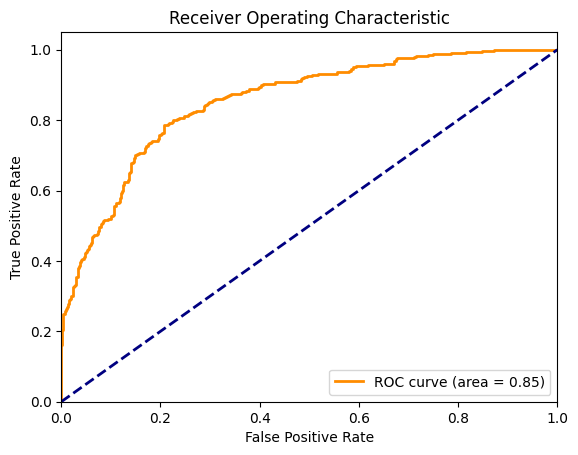

AUC: 0.8536236872438524


In [66]:
import matplotlib.pyplot as plt

print(f"Evaluation Accuracy: {eval_results['eval_accuracy']}")
print(f"Evaluation Loss: {eval_results['eval_loss']}")
print(f"Evaluation Precision: {eval_results['eval_precision']}")
print(f"Evaluation Recall: {eval_results['eval_recall']}")
print(f"Evaluation F1 Score: {eval_results['eval_f1']}")

# Get model predictions
predictions = trainer.predict(test_data).predictions
predicted_probabilities = torch.softmax(torch.tensor(predictions), dim=1)[:, 1]
true_labels = test_data['label']

# Plot ROC curve and compute AUC
auc_value = plot_roc_curve(true_labels, predicted_probabilities)
print(f"AUC: {auc_value}")

## (c) Fine-tune all layers and compare results


In [52]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [56]:
# Unfreeze all layers
for param in model.distilbert.parameters():
    param.requires_grad = True

# Re-train with all layers fine-tuned
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.539299,0.797000,0.795031,0.786885,0.790937
2,No log,0.525400,0.796000,0.822727,0.741803,0.780172
3,No log,0.521474,0.803000,0.808917,0.780738,0.794578


TrainOutput(global_step=375, training_loss=0.5274981689453125, metrics={'train_runtime': 108.0455, 'train_samples_per_second': 27.766, 'train_steps_per_second': 3.471, 'total_flos': 397402195968000.0, 'train_loss': 0.5274981689453125, 'epoch': 3.0})

In [57]:
# Evaluate and output metrics again
eval_results_all_layers = trainer.evaluate()
print(f"Evaluation Results (All Layers): {eval_results_all_layers}")

Evaluation Results (All Layers): {'eval_loss': 0.5214744806289673, 'eval_accuracy': 0.803, 'eval_precision': 0.8089171974522293, 'eval_recall': 0.7807377049180327, 'eval_f1': 0.794577685088634, 'eval_runtime': 8.8032, 'eval_samples_per_second': 113.595, 'eval_steps_per_second': 14.199, 'epoch': 3.0}


Evaluation Accuracy: 0.803
Evaluation Loss: 0.5214744806289673
Evaluation Precision: 0.8089171974522293
Evaluation Recall: 0.7807377049180327
Evaluation F1 Score: 0.794577685088634


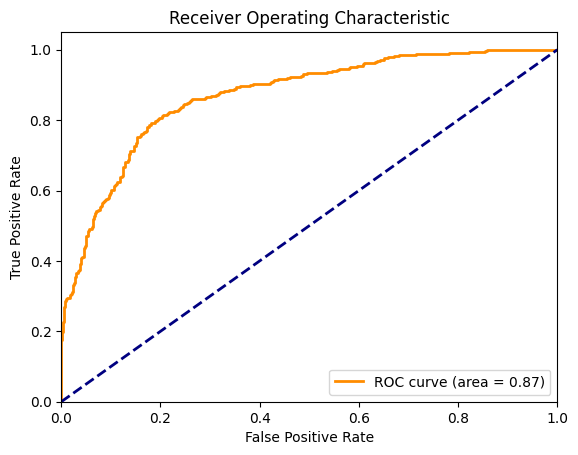

AUC: 0.8692887102971312


In [58]:

print(f"Evaluation Accuracy: {eval_results_all_layers['eval_accuracy']}")
print(f"Evaluation Loss: {eval_results_all_layers['eval_loss']}")
print(f"Evaluation Precision: {eval_results_all_layers['eval_precision']}")
print(f"Evaluation Recall: {eval_results_all_layers['eval_recall']}")
print(f"Evaluation F1 Score: {eval_results_all_layers['eval_f1']}")

# Get model predictions
predictions = trainer.predict(test_data).predictions
predicted_probabilities = torch.softmax(torch.tensor(predictions), dim=1)[:, 1]
true_labels = test_data['label']

# Plot ROC curve and compute AUC
auc_value = plot_roc_curve(true_labels, predicted_probabilities)
print(f"AUC: {auc_value}")

Training all layers results in a lower training loss and evaluation loss than that of training only the last layer of the model. This performance is expected as it allowed the model to adapt to this specific task. Further, the model has more parameters to optimize, increasing model capacity compared to the case when we only optimize parameters from the last layer.
